### 0 Upgrade library if facing `RemoteDataError`


In [ ]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

     |████████████████████████████████| 109 kB 7.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


### 1. Install and import dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

# Gym library: https://github.com/AminHP/gym-anytrading
import gym
import gym_anytrading

# DummyVecEnv is a wrapper to wrap trading environment for stable_baselines
from stable_baselines.common.vec_env import DummyVecEnv
# A2C library wiki https://github.com/Stable-Baselines-Team/stable-baselines
# Original paper: https://arxiv.org/abs/1602.01783
from stable_baselines import A2C

import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib import pyplot as plt

     |████████████████████████████████| 411.5 MB 7.8 kB/s 
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 240 kB 68.3 MB/s 
     |████████████████████████████████| 171 kB 72.8 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 503 kB 78.5 MB/s 
     |████████████████████████████████| 3.8 MB 43.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=2306fbccbf62332987dbe81c46066179db4880d37a8cfb062ee72028ba3dcd84
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


### 2. Import data & visualize

##### 2.1 Import stock data

In [ ]:
# This is the code to use local data
# df = pd.read_csv('YOUR LOCAL OR REMOTE CSV FILE')

df = web.DataReader('TSLA', data_source = 'yahoo', start = '2020-04-04', end = '2022-04-04')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-06,104.199997,99.592003,102.239998,103.248001,74509000.0,103.248001
2020-04-07,113.000000,106.468002,109.000000,109.089996,89599000.0,109.089996
2020-04-08,111.442001,106.666000,110.839996,109.767998,63280000.0,109.767998
2020-04-09,115.036003,111.421997,112.417999,114.599998,68250000.0,114.599998
2020-04-13,130.399994,116.106003,118.031998,130.190002,112377000.0,130.190002
...,...,...,...,...,...,...
2022-03-29,1114.770020,1073.109985,1107.989990,1099.569946,24538300.0,1099.569946
2022-03-30,1113.949951,1084.000000,1091.170044,1093.989990,19955000.0,1093.989990
2022-03-31,1103.140015,1076.640015,1094.569946,1077.599976,16330900.0,1077.599976


##### 2.2 Visualize stock data

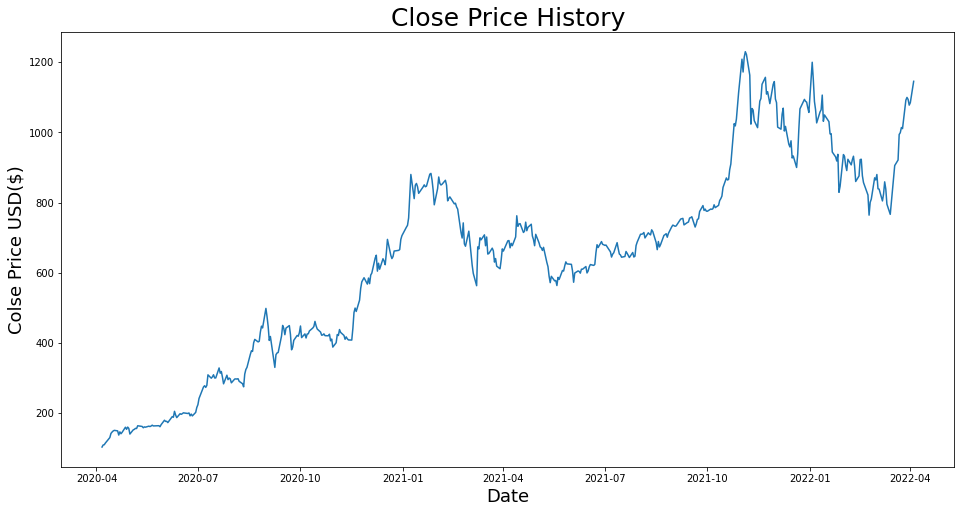

In [ ]:
# Visualize the closing price
plt.figure(figsize=(16, 8))
plt.title('Close Price History', fontsize = 25)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Colse Price USD($)', fontsize = 18)
plt.show()

##### 2.3 (Optional) Visualize a random step

<function matplotlib.pyplot.show>

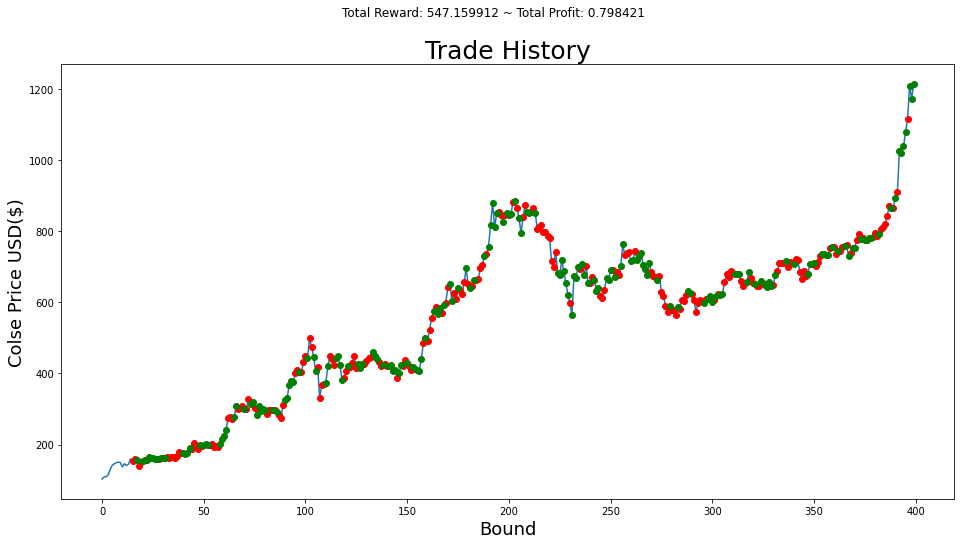

In [ ]:
stocks_env = gym.make('stocks-v0', df = df, frame_bound=(15, 400), window_size = 15)
# stocks_env.prices
# stocks_env.signal_features
# stocks_env.action_space

# Stocks environment re-init
state = stocks_env.reset()
while True:
  # Here take random steps
  action = stocks_env.action_space.sample()
  n_state, reward, done, info = stocks_env.step(action)
  if done:
    break

plt.figure(figsize=(16,8))
plt.cla()
# Show all trades in stocks_env
stocks_env.render_all()
plt.title('Trade History', fontsize = 25)
plt.xlabel('Bound', fontsize = 18)
plt.ylabel('Colse Price USD($)', fontsize = 18)
plt.show

### 3. Build Environment and Train

In [ ]:
env_builder = lambda: gym.make('stocks-v0', df = df, frame_bound = (15, 400), window_size = 15)
env = DummyVecEnv([env_builder])

predict_model = A2C('MlpLstmPolicy', env, verbose = 0)
predict_model.learn(total_timesteps = 600000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




### 4. Evaluation

Predict Result: {'total_reward': 298.7598876953125, 'total_profit': 1.0257845681979003, 'position': 1}


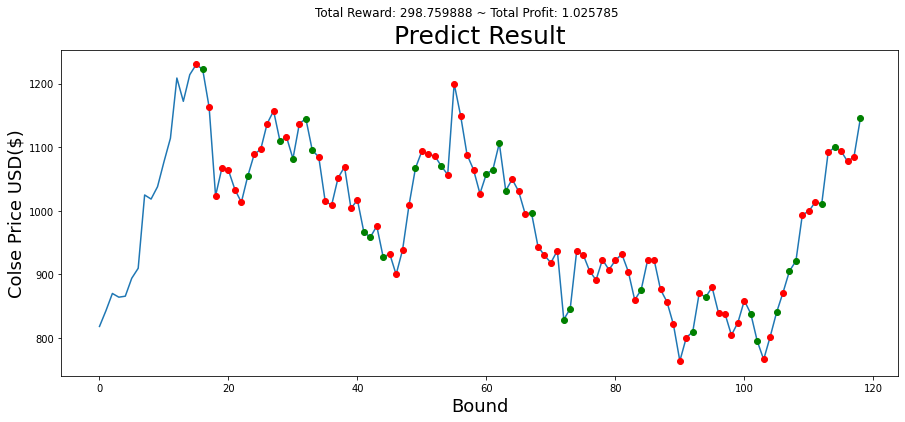

In [103]:
evaluation_env = gym.make('stocks-v0', df = df, frame_bound=(400, 504), window_size = 15)
observation = evaluation_env.reset()
while True: 
    # Reshape the observation for the non-vectorized environment
    observation = observation[np.newaxis, ...]
    action, _states = predict_model.predict(observation)
    observation, rewards, done, info = evaluation_env.step(action)
    if done:
        print("Predict Result:", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
evaluation_env.render_all()
plt.title('Predict Result', fontsize = 25)
plt.xlabel('Bound', fontsize = 18)
plt.ylabel('Colse Price USD($)', fontsize = 18)
plt.show()

### Optimize

- Limitation

- Fixed Window Size VS Increasing Window Size

- Meta-Labeling
